In [1]:
#import useful packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#read in txt file and convert column names to lowercase 
us_bank_wages = pd.read_csv("us_bank_wages/us_bank_wages.txt", sep="\t", index_col=0)
us_bank_wages.columns = us_bank_wages.columns.str.lower()

Take a closer look at the data!

In [3]:
us_bank_wages.head()

,salary,educ,salbegin,gender,minority,jobcat
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1
3,21900,8,13200,0,0,1
4,45000,15,21000,1,0,1


In [4]:
us_bank_wages.tail()

,salary,educ,salbegin,gender,minority,jobcat
469,26250,12,15750,1,1,1
470,26400,15,15750,1,1,1
471,39150,15,15750,1,0,1
472,21450,12,12750,0,0,1
473,29400,12,14250,0,0,1


In [5]:
us_bank_wages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   salary    474 non-null    int64
 1   educ      474 non-null    int64
 2   salbegin  474 non-null    int64
 3   gender    474 non-null    int64
 4   minority  474 non-null    int64
 5   jobcat    474 non-null    int64
dtypes: int64(6)
memory usage: 25.9 KB


***Basic statistical data***

In [6]:
us_bank_wages.describe()

,salary,educ,salbegin,gender,minority,jobcat
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,17016.086498,0.544304,0.219409,1.411392
std,17075.661465,2.884846,7870.638154,0.498559,0.414284,0.773201
min,15750.000000,8.000000,9000.000000,0.000000,0.000000,1.000000
25%,24000.000000,12.000000,12487.500000,0.000000,0.000000,1.000000
50%,28875.000000,12.000000,15000.000000,1.000000,0.000000,1.000000
75%,36937.500000,15.000000,17490.000000,1.000000,0.000000,1.000000
max,135000.000000,21.000000,79980.000000,1.000000,1.000000,3.000000


In [7]:
# No. of unique values for rows gender, min
us_bank_wages.gender.nunique(), us_bank_wages.minority.nunique(), us_bank_wages.jobcat.nunique()

(2, 2, 3)

In [8]:
us_bank_wages.educ.nunique(), us_bank_wages.educ.unique()

(10, array([15, 16, 12,  8, 19, 17, 18, 14, 20, 21]))

Summary dataset characteristics:\
    - 6 columns, 474 instances (all int, no NaN)\
    - 3(or 4?) categorical columns (JOBCAT with number range 1 - 3, educ with 10 cat(?)) - data cleaning might be required\
    - Salary (min 15750, max 135000, mean 34419, i.e. many outliers for high salaries)

Investigate histograms to spot further abnormalities that need our attention.

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'salbegin'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'minority'}>,
        <AxesSubplot:title={'center':'jobcat'}>]], dtype=object)

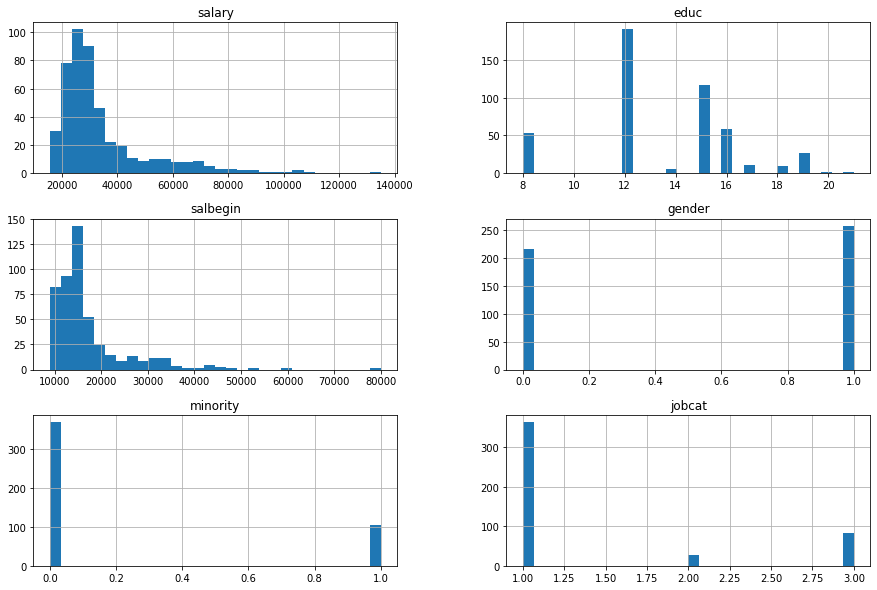

In [9]:
us_bank_wages.hist(bins=30, figsize=(15, 10))

Conclusion:
- salary and salbegin are right skewed\
- gender, minority and jobcat are categorical (education also?!)
- should log the right skewed salary columns

In [10]:
#ln the wages
us_bank_wages['log_salary'] = np.log(us_bank_wages['salary'])
us_bank_wages['log_salbegin'] = np.log(us_bank_wages['salbegin'])
us_bank_wages.head()

,salary,educ,salbegin,gender,minority,jobcat,log_salary,log_salbegin
0,57000,15,27000,1,0,3,10.950807,10.203592
1,40200,16,18750,1,0,1,10.601622,9.838949
2,21450,12,12000,0,0,1,9.973480,9.392662
3,21900,8,13200,0,0,1,9.994242,9.487972
4,45000,15,21000,1,0,1,10.714418,9.952278


Take a closer look at the correlation between the different parameters

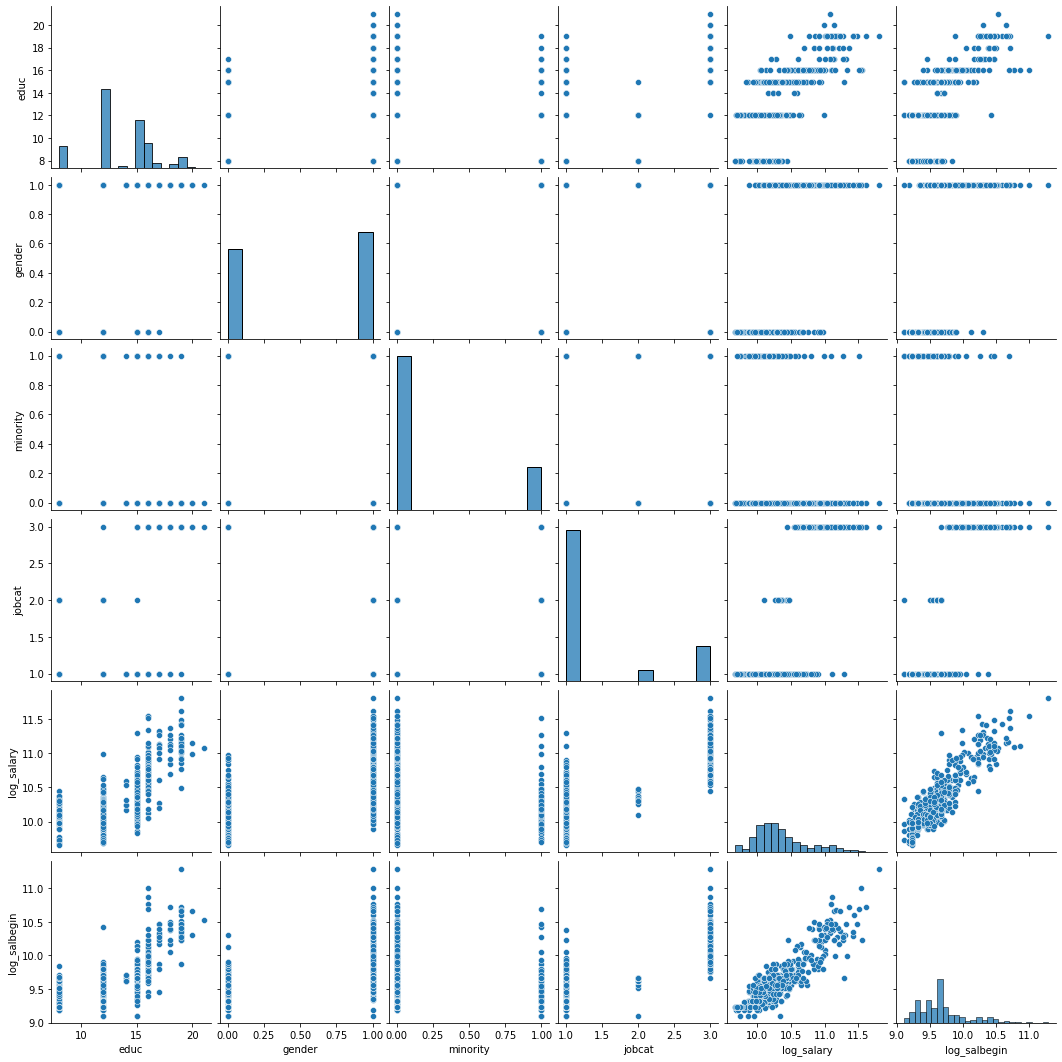

In [11]:
usb_c = us_bank_wages[['educ', 'gender', 'minority', 'jobcat', 'log_salary', 'log_salbegin']]
sns.pairplot(usb_c)

- Salbegin appears to have a linear relationship with salary.\
- a clear relationship between gender (0=female) and salary, as well as minority (0=nonminorities) and salary is also evident
- a correlation between education and salary is given
- jobcategory (1 for administrative jobs, 2 for custodial jobs, 3 for management jobs) also vlear relationship

In [41]:
#X = us_bank_wages.salbegin
#X = sm.add_constant(X)
#y = us_bank_wages.salary

# NOTE slight improvement for r^2 with log

#sm.OLS(y,X).fit().summary()

smf.ols(formula='log_salary ~ log_salbegin', data=us_bank_wages).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1730.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          5.79e-160
Time:                        22:12:07   Log-Likelihood:                 130.43
No. Observations:                 474   AIC:                            -256.9
Df Residuals:                     472   BIC:                            -248.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7054      0.232      3.038      0.003       0.249       1.162
log_salbegin     0.9981      0.024     41.593      0.000       0.951       1.045
==============================================================================
Omnibus:                       47.480   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.176
Skew:                           0.661   Prob(JB):                     2.87e-17
Kurtosis:                       4.452   Cond. No.                         268.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='log_salary', ylabel='log_salbegin'>

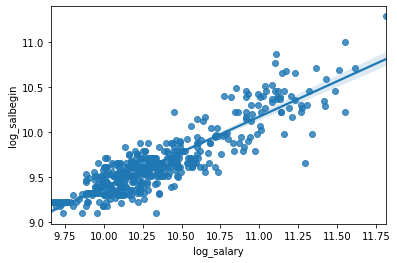

In [13]:
sns.regplot(x='log_salary', y='log_salbegin', data=us_bank_wages)

In [14]:
smf.ols(formula='log_salary ~ educ', data=us_bank_wages).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     445.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.15e-70
Time:                        22:08:37   Log-Likelihood:                -77.109
No. Observations:                 474   AIC:                             158.2
Df Residuals:                     472   BIC:                             166.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0621      0.063    144.445      0.000       8.939       9.185
educ           0.0960      0.005     21.102      0.000       0.087       0.105
==============================================================================
Omnibus:                       20.981   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.526
Skew:                           0.518   Prob(JB):                     1.28e-05
Kurtosis:                       3.257   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='log_salary', ylabel='educ'>

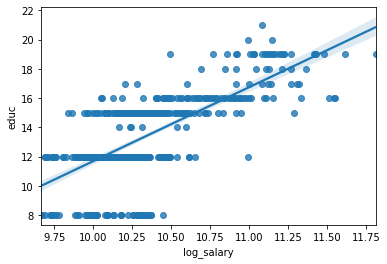

In [15]:
sns.regplot(x='log_salary', y='educ', data=us_bank_wages)

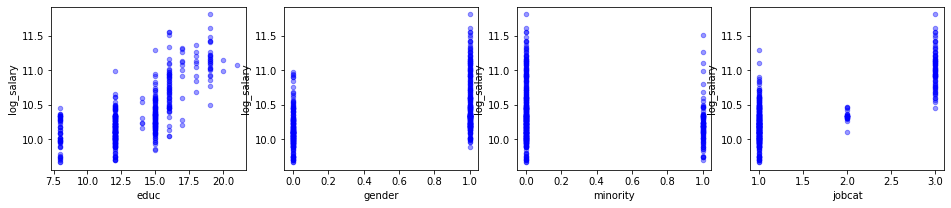

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['educ', 'gender', 'minority', 'jobcat'], axes):
    us_bank_wages.plot(kind='scatter', x=xcol, y='log_salary', ax=ax, alpha=0.4, color='b')

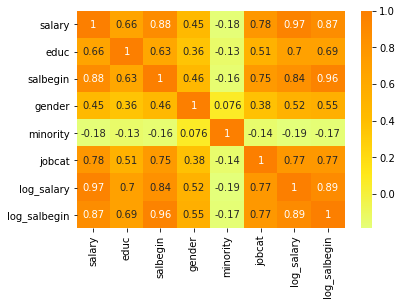

In [17]:
# correlation plot
corr = us_bank_wages.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

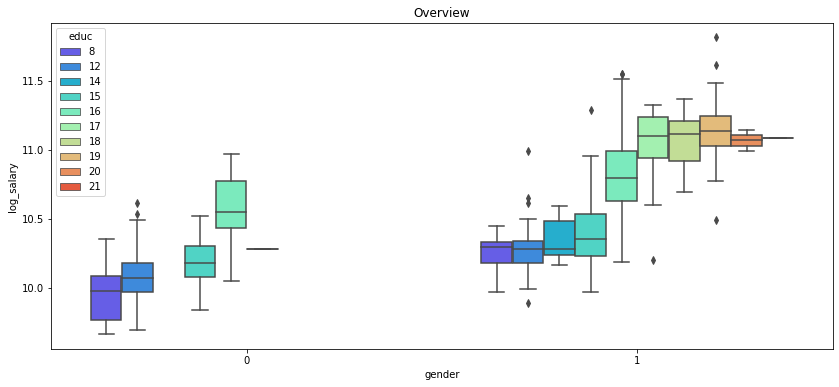

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='gender', y='log_salary',hue='educ',data=us_bank_wages,palette='rainbow')
plt.title('Overview');

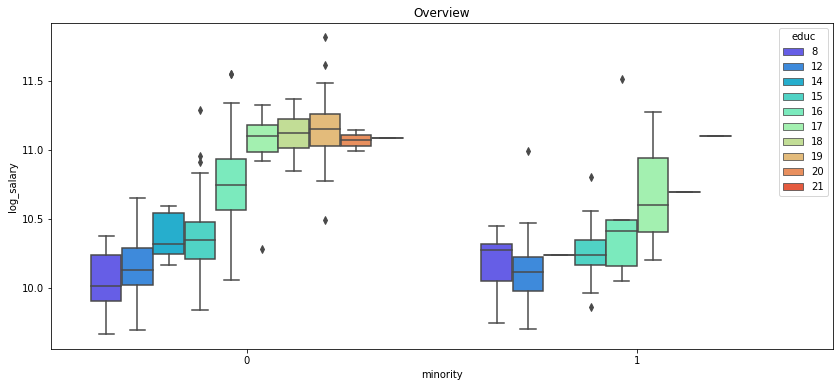

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(x='minority', y='log_salary',hue='educ',data=us_bank_wages,palette='rainbow')
plt.title('Overview');

CONCLUSION: bin educ: (8, 12, 14, 15), (16, 17, 18, 19), (20, 21) or always two?

Part 2:
    Building a model with multivariate linear regression

Generate training testset

Generate new df with dummy variables

In [20]:
us_bank_wages_dum = pd.get_dummies(us_bank_wages, columns=['gender', 'minority', 'jobcat'],
                                   drop_first=True, prefix=['gender', 'minority', 'jobcat'])
us_bank_wages_dum.head()

,salary,educ,salbegin,log_salary,log_salbegin,gender_1,minority_1,jobcat_2,jobcat_3
0,57000,15,27000,10.950807,10.203592,1,0,0,1
1,40200,16,18750,10.601622,9.838949,1,0,0,0
2,21450,12,12000,9.973480,9.392662,0,0,0,0
3,21900,8,13200,9.994242,9.487972,0,0,0,0
4,45000,15,21000,10.714418,9.952278,1,0,0,0


In [21]:
us_bank_wages_dum2 = pd.get_dummies(us_bank_wages_dum, columns=['educ'],
                                   drop_first=False, prefix=['educ'])
us_bank_wages_dum2 = us_bank_wages_dum2.drop('educ_21', 1)
us_bank_wages_dum2.head()

,salary,salbegin,log_salary,log_salbegin,gender_1,minority_1,jobcat_2,jobcat_3,educ_8,educ_12,educ_14,educ_15,educ_16,educ_17,educ_18,educ_19,educ_20
0,57000,27000,10.950807,10.203592,1,0,0,1,0,0,0,1,0,0,0,0,0
1,40200,18750,10.601622,9.838949,1,0,0,0,0,0,0,0,1,0,0,0,0
2,21450,12000,9.973480,9.392662,0,0,0,0,0,1,0,0,0,0,0,0,0
3,21900,13200,9.994242,9.487972,0,0,0,0,1,0,0,0,0,0,0,0,0
4,45000,21000,10.714418,9.952278,1,0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
us_bank_wages_dum2.columns

Index(['salary', 'salbegin', 'log_salary', 'log_salbegin', 'gender_1',
       'minority_1', 'jobcat_2', 'jobcat_3', 'educ_8', 'educ_12', 'educ_14',
       'educ_15', 'educ_16', 'educ_17', 'educ_18', 'educ_19', 'educ_20'],
      dtype='object')

NOTE: consider reducing no. of bins for educ?!

In [23]:
# m l regression
model_1 = smf.ols(formula='log_salary ~ log_salbegin + gender_1 + jobcat_2 + \
                jobcat_3 + educ_12 + educ_14 + educ_15 + educ_16 + educ_17 + educ_18 + \
                educ_19 + educ_20', data=us_bank_wages_dum2).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     184.2
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          2.85e-167
Time:                        22:08:51   Log-Likelihood:                 181.86
No. Observations:                 474   AIC:                            -337.7
Df Residuals:                     461   BIC:                            -283.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2738      0.444      9.619   

In [24]:
# remove columns with high p-value, i.e. educ_20+21, but no sign. difference
# went further up to drop last column in dummies part! ie21
model_2 = smf.ols(formula='log_salary ~ log_salbegin + gender_1* + jobcat_2 + \
                jobcat_3 + educ_12 + educ_14 + educ_15 + educ_16 + educ_17 + educ_18 + \
                educ_19', data=us_bank_wages_dum2).fit()
print(model_2.summary())


#model_2 = smf.ols(formula='log_salary ~ c(log_salbegin + gender_1 + minority_1 + jobcat_2 + \
#                jobcat_3 + educ_12 + educ_14 + educ_15 + educ_16 + educ_17 + educ_18 + \
#                educ_19'), data=us_bank_wages_dum2).fit()
#to convert to dummy in situ

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     200.7
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          3.89e-168
Time:                        22:08:52   Log-Likelihood:                 181.15
No. Observations:                 474   AIC:                            -338.3
Df Residuals:                     462   BIC:                            -288.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1784      0.43

In [25]:
model_3 = smf.ols(formula='log_salary ~ gender + educ + jobcat', data=us_bank_wages).fit()
#to convert to dummy in situ
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     474.1
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          1.06e-141
Time:                        22:08:53   Log-Likelihood:                 95.518
No. Observations:                 474   AIC:                            -183.0
Df Residuals:                     470   BIC:                            -166.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2242      0.044    208.157      0.0

In [26]:
model_4 = smf.ols(formula='log_salary ~ jobcat + educ',
                  data=us_bank_wages).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     608.2
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          3.06e-131
Time:                        22:08:54   Log-Likelihood:                 67.848
No. Observations:                 474   AIC:                            -129.7
Df Residuals:                     471   BIC:                            -117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1919      0.047    196.775      0.0

In [27]:
print(model_4.params)

Intercept    9.191939
jobcat       0.290647
educ         0.055934
dtype: float64


In [28]:
#prediction
#model_2.predict([1,120])
#ypred = model_2.predict(X)
#print(ypred)

#model_2.predict(exog=dict(x1=x1n))

SciKitLearn regression

In [47]:
#feature matrix: select subset of original df
#X = us_bank_wages[['educ', 'gender']] this works
X = us_bank_wages[['educ', 'gender']]
#X = np.c_[X, X[:, 0] * X[:, 1]]
print(X.head())
print(type(X))
print(X.shape)

   educ  gender
0    15       1
1    16       1
2    12       0
3     8       0
4    15       1
<class 'pandas.core.frame.DataFrame'>
(474, 2)


In [30]:
#select series from dataframe as target
y = us_bank_wages.log_salary
print(type(y))

<class 'pandas.core.series.Series'>


In [31]:
#Split data, default 25% of data for testing, 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(355, 2)
(355,)
(119, 2)
(119,)


In [33]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data, i.e. learn coefficients
linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
# intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

9.207332661297077
[0.07590101 0.23766188]


In [35]:
#pair feature names with coefficients NOT NEEDED
#zip(['jobcat_2', 'jobcat_3', 'educ_12', 'educ_14', 'educ_15', 'educ_16', 'educ_17', 'educ_18', 'educ_19'], linreg.coef_)

In [36]:
#predict test set
y_pred = linreg.predict(X_test)

In [37]:
#define true and predicted response values
#true = [XX, XX, XX, XX, XX]
#pred = [XX, XX, XX, XX, XX]

In [38]:
# calculate RMSE
#print(np.sqrt(metrics.mean_squared_error(true, pred)))

# RMSE with scikitlearn
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mean_squared_error(y_test, y_pred, squared=False)

0.2581354325781343

In [ ]:
#test another model